## 4.2 激活函数—加入非线性因素，解决线性模型缺陷

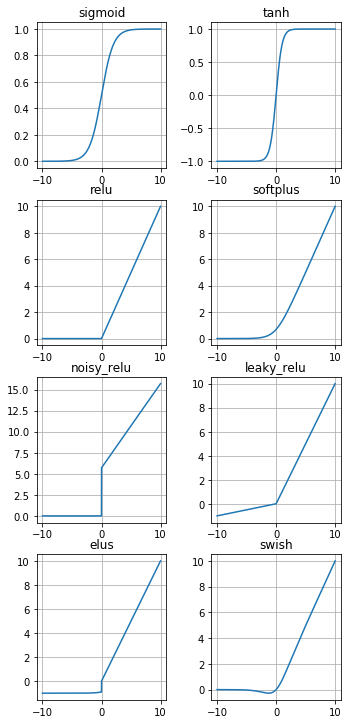

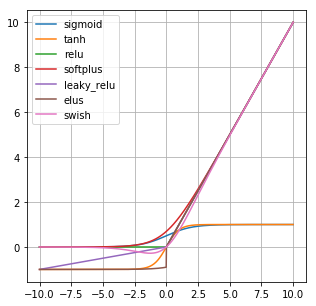

In [77]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 1000)
# Sigmoid函数
sigmoid = 1/(1+np.exp(-x))

# Tanh函数
tanh = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

# Relu函数
relu = np.where(x > 0, x, 0)

# Softplus函数
softplus = np.log(1+np.exp(x))

# Noisy relus函数
noisy_relu = np.where(x > 0, x+np.random.normal(loc=0, scale=np.std(x)), 0)

# Leaky relus函数
leaky_relu = np.where(x > 0, x, 0.1*x)

# Elus函数
elus = np.where(x>0, x, (0.1 * np.exp(x)-1))

# Swish函数
swish = (x * sigmoid)

loss_func = [sigmoid, tanh, relu, softplus, noisy_relu, leaky_relu, elus, swish]
loss_func_tf=['sigmoid',
              'tanh',
              'relu',
              'softplus',
              'noisy_relu',
              'leaky_relu',
              'elus',
              'swish']

fig, axes = plt.subplots(4, 2, figsize=(5, 10))
fig.tight_layout()

for loss_func, loss_func_tf, ax in zip(loss_func, loss_func_tf, axes.ravel()):
    ax.set_title(loss_func_tf)
    ax.grid()
    ax.plot(x, loss_func)
plt.show()

plt.figure(figsize=(5,5))
plt.grid()
plt.plot(x, sigmoid, label='sigmoid')
plt.plot(x, tanh, label='tanh')
plt.plot(x, relu, label='relu')
plt.plot(x, softplus, label='softplus')
plt.plot(x, leaky_relu, label='leaky_relu')
plt.plot(x, elus, label='elus')
plt.plot(x, swish, label='swish')
plt.legend()
plt.show()

## 4.5 softmax算法与损失函数的综合应用

### 4.5.1 交叉熵实验

In [79]:
# 假设有一个标签labels和一个网络输出值logits
# 两次softmax实验: 将输出值logits分别进行一次和两次softmax，观察两次的区别和意义
# 观察交叉熵：将上一步中的两个值分别进行softmax_corss_entropy_with_logits,观察它们的区别
# 自建公式实验：将两次softmax的值放入自建组合的公式中得到正确的值

import tensorflow as tf

# labels and logits
labels = [[0, 0, 1], [0, 1, 0]]
logits = [[2, 0.5, 6],
          [0.1, 0, 3]]

logits_scaled = tf.nn.softmax(logits)
logits_sacled2 = tf.nn.softmax(logits_scaled)

### 4.5.2 one_hot实验